In [1]:
import data_parser as p
from correllate import calculate_N_c, calculate_g2, calculate_Nc_np
import pandas as pd
import numpy as np
from scipy.signal import correlate

In [2]:
z = p.from_little_endian_to_int("data.txt")

In [3]:
output = p.split_into_parts(z)

In [4]:
p.create_channels("data.txt")

In [5]:
def in_channel(data, ch_num):
    ch = 4 - ch_num
    if data[1][ch] == '1':
        return True
    elif data[0] == '1':
        return True
    else: 
        return False

def get_channels(data):
    return [[d[2] for d in data if in_channel(d, i)] for i in range(1,5)]

In [6]:
p.extact_data("./data/test_lower.txt")

In [37]:
channels = get_channels(output)

In [50]:
y = []
for i in channels[0]:
    if i == 0: 
        break
    else: 
        y.append(i)
len(y)

with open("ch1.txt", "w") as f: 
    for i in y: 
        f.write(str(i)+"\n")

In [39]:
N  = 500

In [40]:
T = len(y[0:N]) * 20e-9
tau = 20e-9

In [41]:
result = calculate_N_c(np.array(y[0:N]), np.array(y[0:N]))

In [28]:
import matplotlib.pyplot as plt

In [29]:
r2 =  calculate_Nc_np(np.array(y[0:N]), np.array(y[0:N]))

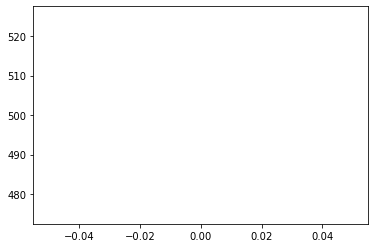

In [32]:
plt.plot(r2.keys(), r2.values())

In [30]:
avg = sum(result.values())/len(result.values())

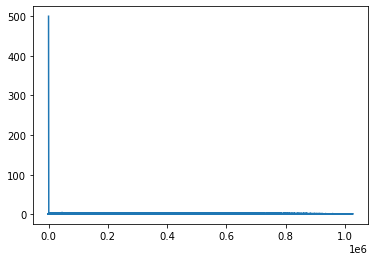

In [42]:
plt.plot(result.keys(), result.values())

In [43]:
test = np.zeros(y[5]+1)
for i in range(5):
    test[y[i]] = 1
g= pd.Series(test)


In [44]:
t = np.fft.ifft(np.fft.fft(test)*np.fft.fft(test))

/Users/jordanchuri/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


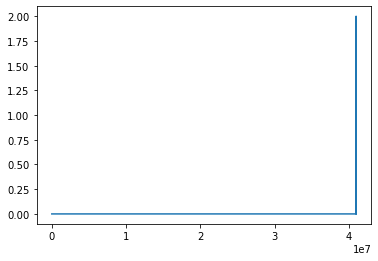

In [45]:
plt.plot(t)